# Accessing image files in the nextcloud
This notebook we will demonstrate how to download files from a nextcloud server, how to process them locally and upload the results back to the server.

If you work or study at Leipzig University you can sign up for an account on such a server [here](https://www.urz.uni-leipzig.de/unsere-services/servicedetail/service/eigener-cloud-speicher-speicherwolke).

In [1]:
from skimage.io import imread, imsave
from skimage.measure import label
import ipywidgets as widgets
import stackview

import nextcloud_client

## Login
After executing the next cell locally, you will see three input fields where you can enter the server url, username and password.

![](login.png)

In [2]:
server_widget = widgets.Text(value='https://speicherwolke.uni-leipzig.de', description='Server')
username_widget = widgets.Text(description='Username:')
password_widget = widgets.Password(description='Password')

widgets.VBox([server_widget, username_widget, password_widget])

**Do NOT hit Shift-Enter after entering username and password**

In [3]:
if username_widget.value == '':
    raise RuntimeError('Enter username and password above')

In [4]:
ncc = nextcloud_client.Client(server_widget.value)
ncc.login(username_widget.value, password_widget.value)

In [5]:
# reset password
password_widget.value = ""

A typical error message is 401: Access denied. Check your username and password.

## Browsing the remote server
To see if the connection was successful, we can just list the files in a given folder.

In [7]:
# enter a folder on the owncloud drive that exists. '/' is the root folder.
remote_folder = "/data/"

for f in ncc.list(remote_folder):
    print (f.path)

/data/blobs.tif


## Retrieving a file
We can download a file to a local directory.

In [8]:
# enter the source file here
remote_source_file = '/data/blobs.tif'
# enter the destination
local_file = 'blobs.tif'

ncc.get_file(remote_path=remote_source_file, 
            local_file=local_file)

True

## Image processing
As we downloaded the file, image processing works as usual.

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
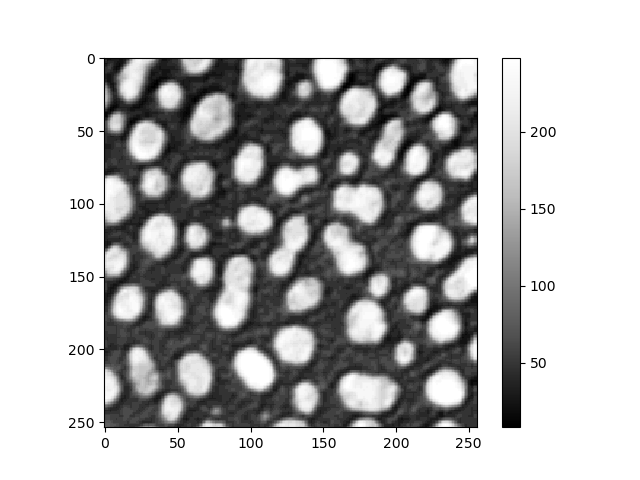
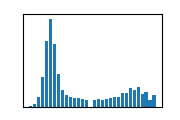

In [9]:
image = imread(local_file)
stackview.insight(image)

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
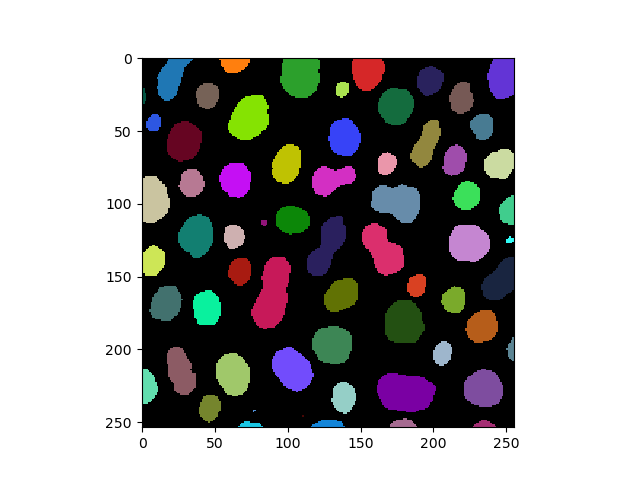

In [10]:
labels = label(image > image.max() / 2)
stackview.insight(labels)

## Uploading results
Before uploading an image to the cloud we need to save it locally.

In [11]:
local_file_to_upload = "blobs_labels.tif"

imsave(local_file_to_upload, labels, check_contrast=False)

We will upload the file to this folder:

In [12]:
remote_folder

'/data/'

In [13]:
ncc.put_file(remote_folder, local_file_to_upload)

True

Just to be sure, we check if the file arrived by printing out the files in the folder again.

In [14]:
for f in ncc.list(remote_folder):
    print (f.path)

/data/blobs.tif
/data/blobs_labels.tif


## Logout
When you're done, log out!

In [15]:
ncc.logout()

True